# Límite de Shockley–Queisser

![](photovoltaic-effect.gif)

## Bandas de conduccion y Bandgap

![](band-gap.png)

## Primero librerias

In [52]:
import numpy as np # modulo de computo numerico
import matplotlib.pyplot as plt # modulo de graficas
import pandas as pd # modulo de datos
import seaborn as sns
import scipy as sp
import  scipy.interpolate, scipy.integrate # para interpolar e integrar
import wget, tarfile # para bajar datos y descompirmir
from __future__ import print_function

# esta linea hace que las graficas salgan en el notebook
%matplotlib inline

## Graficas chidas!

In [5]:
def awesome_settings():
    # awesome plot options
    sns.set_style("white")
    sns.set_style("ticks")
    sns.set_context("paper", font_scale=2)
    sns.set_palette(sns.color_palette('bright'))
    # image stuff
    plt.rcParams['figure.figsize'] = (12.0, 6.0)
    plt.rcParams['savefig.dpi'] = 60
    plt.rcParams['lines.linewidth'] = 4
    return

%config InlineBackend.figure_format='retina'
awesome_settings()

# 1  A graficar el Hermoso Espectro Solar



## Primero constantes numericas

Utilizaremos un modulo que manejara unidades numericas y fisicas:

In [6]:
import numericalunits as nu

Para usarlo convertimos numeros a unidades, por ejemplo:

`x = 5 * nu.cm` significa "x es igual a 5 centimetros".

si quieres sacar el valor numerico de x, podemos dividir por las unidades

`y = x / nu.mm `, en este caso tenemos el valor numerico en milimetros.

### Pruebalo!

Definimos la Celda solar cualquiera a una temperatura de 300 kelvin:

In [7]:
Tcell = 300 * nu.K

## Bajar datos

Aveces los datos que queremos se encuentran en el internet.

Aqui usaremos datos del NREL (National Renewable Energy Laboratory): [http://rredc.nrel.gov/solar/spectra/am1.5/](http://rredc.nrel.gov/solar/spectra/am1.5/)  
del espectro solar  (AM1.5G) con intensity (1000 W/m2). 

Primero lo bajamos y lo descomprimimos:

In [5]:
data_url = 'http://rredc.nrel.gov/solar/spectra/am1.5/ASTMG173/compressed/ASTMG173.csv.tar'
a_file = wget.download(data_url)
download_as_tarfile_object = tarfile.open(fileobj=a_file)
csv_file = download_as_tarfile_object.extractfile('ASTMG173.csv')

NameError: name 'wget' is not defined

## Que tamanio tienen los datos?

In [8]:
csv_file = 'ASTMG173.csv'
downloaded_array = np.genfromtxt(csv_file, delimiter=",", skip_header=2)
downloaded_array.shape

(2002, 4)

## Manipular datos
La columna 0 es la longitud de onda y la 2 es los datos AM1.5G

In [9]:
AM15 = downloaded_array[:,[0,2]]
print(AM15)

[[  2.80000000e+02   4.73090000e-23]
 [  2.80500000e+02   1.23070000e-21]
 [  2.81000000e+02   5.68950000e-21]
 ..., 
 [  3.99000000e+03   7.37230000e-03]
 [  3.99500000e+03   7.21000000e-03]
 [  4.00000000e+03   7.10430000e-03]]


## Vamos a dar unidades a cada columna

* Columna1 es $\lambda$ numeros onda, entonces queremos usar $nm$ (**nu.nm**).
* Columna2 es **energia** entonces queremos usar usar $W/(m^{2}nm)$ (**nu.W**,**nu.m**,**nu.nm**).


In [10]:
AM15[:,0] *= nu.nm
AM15[:,1] *= nu.W * nu.m**-2 * nu.nm**-1

## Actividad: Limites de los datos

Para los limites de numeros onda ($\lambda$), podemos usar **np.min** y **np.max**.

Para la energia usaremos la formula 
$$
E = \frac{\hbar c_0}{\lambda}
$$

In [11]:
wavelength_min = 
wavelength_max = 
E_min = nu.hPlanck * nu.c0
E_max = nu.hPlanck * nu.c0

## Creamos una funcion, interpolando valores intermedios

In [12]:
AM15interp = scipy.interpolate.interp1d(AM15[:,0], AM15[:,1])

## Conseguimos los valores x, y
### Actividad : consigue datos x y y
Pista: 

* para **x** podemos usar linspace entre el valor minimo y maximo.
* para **y** creamos una lista y llenamos los datos de la funcion con x

In [13]:
x = 
y = 

## Tiempo de Graficar

### Actividad: Grafica el spectro solar

**Ojo:** No se te olvide agregar titulos e informacion a la grafica

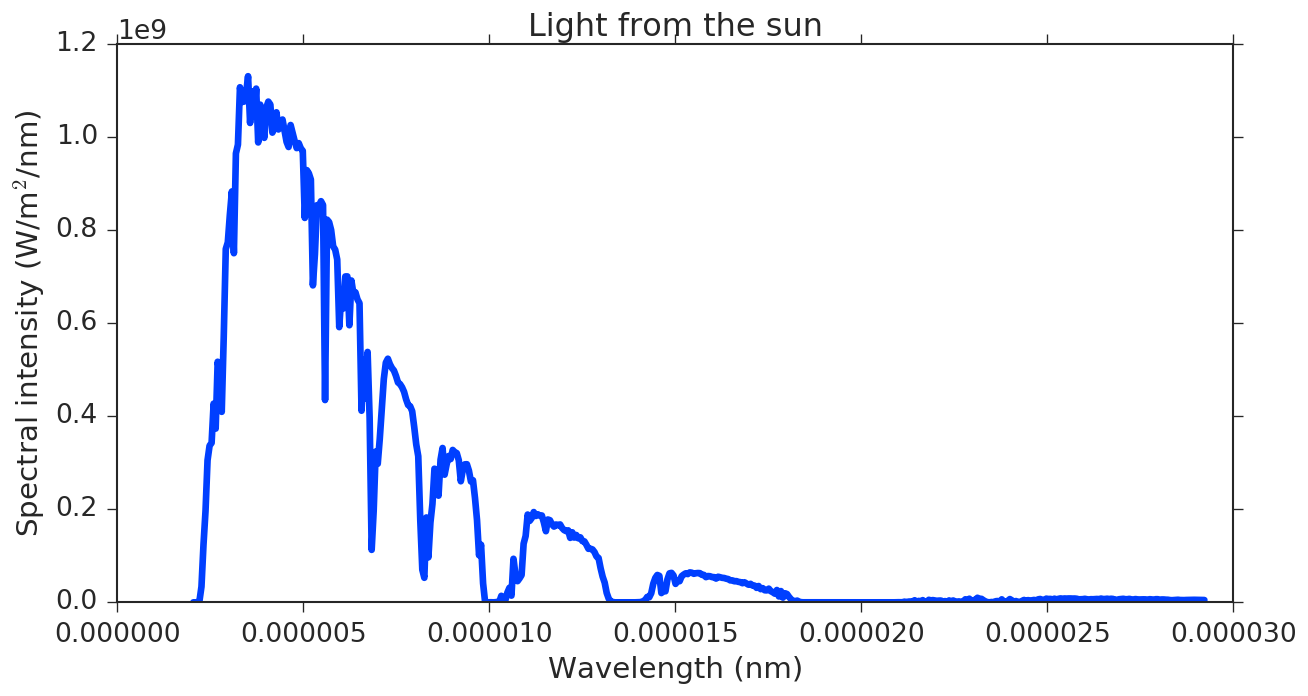

## Compara con el espector visible
![](visible-spectrum.png)

# 3-6 Donde perdemos eficiencia?


Podemos indentificar 5 partes:

* **Conversion de energia a electricidad util**
* **Energia fotonica debajo del bandgap**, esta energia no se absorbe y entonces no se gasta.
* **Energia fotonica en exceso del bandgap**: esto es por que el electron y el hoyo se relajan inmediatamente a borde de las bandas. Por ejemplo, para un semiconductor de 1eV-bandgap, un foton de  3eV crea el mismo par electron-hoyo que uno foton de 1.01eV. Esos 2eV de energia extra que tenia el 3eV se pierden.
* **Recombination de electron-hoyos**: toda la recombinacion en el punto de maxima energia (max-power-point) se disipa como calor;
* **Voltaje de la celda** : el voltaje  max-power-point is less than the bandgap.

Podemos poner esto en una ecuacion:

$(\text{Energia solar entrante}) = V_{MPP} \times I_{MPP}$<br>
$ \qquad + (\text{Energia fotonica debajo del bandgap})$<br>
$ \qquad + (\text{Energia fotonica arriba del bandgap} - \text{Numero de fotones arriba del bandgap} \times \text{Energia Bandgap})$<br>
$ \qquad + ((\text{Numero de fotones arriba del bandgap}) - I_{MPP} / e) \times (\text{Energia Bandgap})$<br>
$ \qquad + I_{MPP} \times (\text{Voltaje del Bandgap} - V_{MPP})$<br>

# 2 - Luz incidente


## Calcularemos una cantidad mas intuitiva
### Fotones por unidad de tiempo, area y rango de energia 


Haremos este cambio para hacer calculos en funcion de fotones en vez de numero onda.

Para esto definimos **FotonesPorTEA** (Tiempo, Energia, Area). Convertimos los datos AM1.5 a estas nuevas unidades usando la formula:

$\text{FotonesPerTEA} = \frac{d(\text{numero de fotos, por unidad de tiempo, por unidad de area})}{dE} = \frac{d(\text{Energia foton por unidad de area})}{d\lambda} \; \frac{(\text{numero de fotos, por unidad de tiempo, por unidad de area})}{(\text{Energia foton por unidad de area})} \left| \frac{d\lambda}{dE} \right| = $
$ = (\text{AM1.5 spectro}) \; \frac{1}{\text{energia foton}} \; \frac{hc}{E^2}$

(Usamos $\left| \frac{d\lambda}{dE} \right| = \left| \frac{d}{dE} (\frac{hc}{E}) \right| = \frac{hc}{E^2}$.)

In [21]:
def FotonesPorTEA(Ephoton):
    wavelength = nu.hPlanck * nu.c0 / Ephoton
    return AM15interp(wavelength) * (1 / Ephoton) * (nu.hPlanck * nu.c0 / Ephoton**2)

## Ejemplo:

Este calculo nos dice que hay cerca de $1.43 \times 10^{18}$ fotones solares con energia solar photons with energy entre 2eV y 2.001eV pegandole a un metro cuadrado (m^2) por segundo:

In [22]:
print(FotonesPorTEA(2 * nu.eV) * (1 * nu.meV) * (1 * nu.m**2) * (1 * nu.s))

1.4256732564e+18


## Constante Solar

Esta constante es irradiancia total del sol. Debe de estar cerca de 1000 W/m^2 , asi NREL normalizo sus datos.

In [23]:
PowerPorTEA = lambda E : E * FotonesPerTEA(E)
# quad() es integracion
solar_constant = sp.integrate.quad(PowerPorTEA,E_min,E_max, full_output=1)[0]
print(solar_constant / (nu.W/nu.m**2))

999.932769214




# 3 - Fotones arriba del bandgap

Para un dado bangap, definimos la funcion que es el numero total de fotones con energia arriba del bandgap, por unidad de tiempo, por unidad de espacio


In [24]:
def fotones_arriba_gap(Egap):
    return scipy.integrate.quad(FotonesPorTEA, Egap, E_max, full_output=1)[0]

### Ejemplo:

Hay $2.76 \times 10^{21}$ fotones con energia  arriba de 1.1eV que le pegan a un pedazo de $1m^2$ en un segundo:

In [25]:
print(fotones_arriba_gap(1.1 * nu.eV) * (1 * nu.m**2) * (1 * nu.s))

2.76191826278e+21


## En funcion de la energia

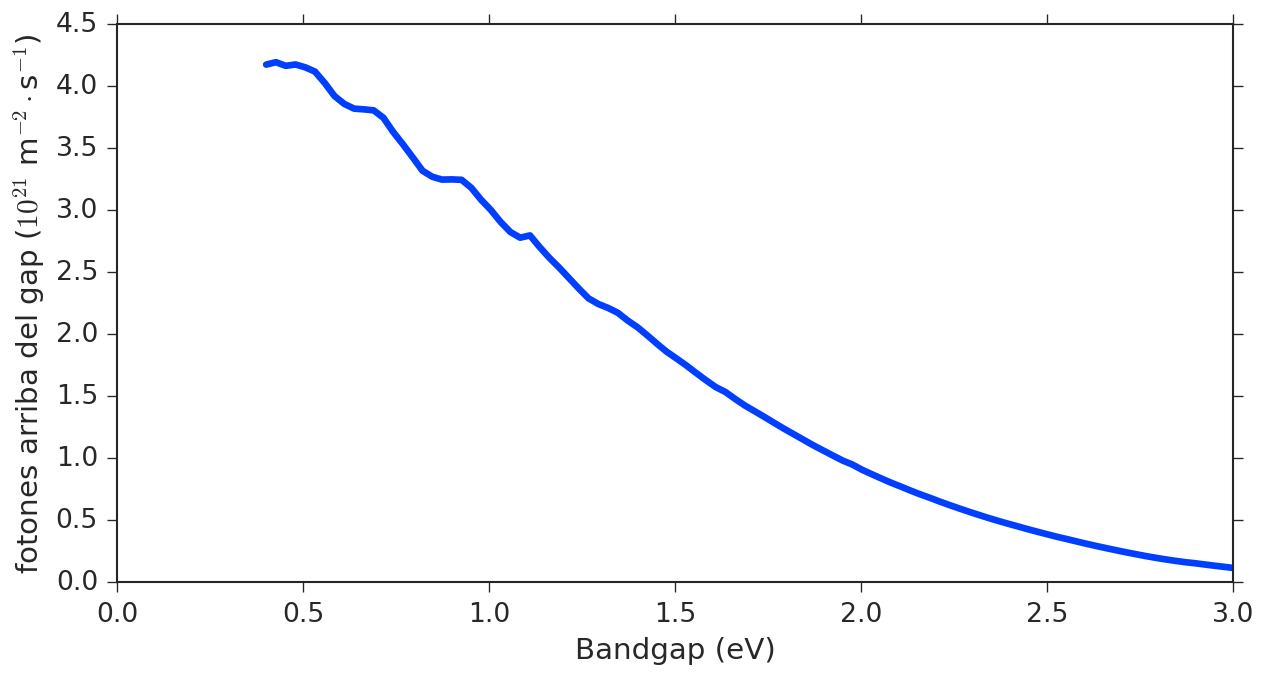

In [27]:
Egap_list = np.linspace(0.4 * nu.eV, 3 * nu.eV, num=100)
y_values = np.array([fotones_arriba_gap(E) for E in Egap_list])
plt.plot(Egap_list / nu.eV , y_values / (1e21 * nu.m**-2 * nu.s**-1))
plt.xlabel("Bandgap (eV)")
plt.ylabel("fotones arriba del gap ($10^{21}$ m$^{-2} \cdot $s$^{-1}$)");

# 4 Recombinacion
## Un poco abstracto (falta traducir)

In the best possible case, the only cause of electron-hole-pair recombination is radiative recombination. Radiative recombination occurs when an electron and hole collide, so it depends on how many electrons and holes there are, or more specifically it depends
on the electron and hole QFLs.

### Recombination rate when electron QFL = hole QFL ("QFL" is "Quasi-Fermi Level")

This is the case where electron QFL = hole QFL throughout the semiconductor. An example is the solar cell at zero bias in the dark. Then it’s in thermal equilibrium and its radiation can be calculated by the blackbody formula – more specifically, assuming it’s a perfect blackbody above the bandgap and white-body below the bandgap. We also assume isotropic radiation from the top surface, and a mirror on the bottom surface.

Let RR0 be the "Radiative Recombination rate at 0 QFL splitting", (per solar-cell area). By the blackbody formula:
$$\text{RR0} = \frac{2\pi}{c^2 h^3} \int_{E_{gap}}^{\infty} \frac{E^2 dE}{\exp(E/(k_B T_{cell})) - 1}$$

In [28]:
def RR0(Egap):
    integrand = lambda E : E**2 / (np.exp(E / (nu.kB * Tcell)) - 1)
    integral = scipy.integrate.quad(integrand, Egap, E_max, full_output=1)[0]
    return ((2 * np.pi) / (nu.c0**2 * nu.hPlanck**3)) * integral

## Recombination rate when electron QFL and hole QFL are split

By kinetic theory, the radiative recombination rate is proportional to the product of electron concentration
and hole concentration, $p\times n$. If you move the electron QFL up towards the conduction band by energy $E$,
the electron concentration increases by $\exp(-E/kT)$. Likewise, if you move the hole QFL down towards the
valence band by E, the hole concentration increases by $\exp(E/k_BT)$. Either way,
$p\times n \propto \exp(E/k_BT)$, where $E$ is the QFL energy splitting.

In the best possible case, the QFL splitting is equal to the external voltage (in reality, it may be larger
than the external voltage). Therefore, the lowest possible radiative recombaniton rate is:

$$\text{Recomb rate} = e \text{RR0} \exp(e V / k_B T_{cell}),$$

where $V$ is the external voltage.

<p style="font-size:80%">Note for pedants: I’m using the expression for radiative recombination $\frac{2\pi}{c^2 h^3} \exp(eV/k_B T_{cell})\int_{E_{gap}}^\infty \frac{E^2 dE}{\exp(E/k_B T_{cell})-1}.$ This isn't quite right: A more accurate expression is: $\frac{2\pi}{c^2 h^3} \int_{E_{gap}}^\infty \frac{E^2 dE}{\exp((E-eV)/k_B T_{cell})-1}.$ The difference is negligible except for tiny tiny bandgaps (less than 200meV). For explanation see <a href="http://dx.doi.org/10.1109/T-ED.1980.19950">link</a> or <a href="http://dx.doi.org/10.1007/BF00901283">link</a>. (Thanks Ze’ev!)</p>

## J-V curve
The current is from the electron-hole pairs that are created but which don’t recombine. In the best case, all the solar photons possible are absorbed, while none recombine except radiatively. This gives:

$$J = e (\text{SolarPhotonsAboveGap} - \text{RR0} (\exp(e V / k_B T_{cell}) - 1 ))$$

where $J$ is the current per unit area, and $V$ is the forward bias on the junction. The "-1" on the right accounts for spontaneous
generation of e-h pairs through thermal fluctuations at 300K. I will leave out the "-1" below because
$\text{RR0} \ll \text{SolarPhotonsAboveGap}$, at least in the range of bandgaps that I'm plotting.

In [34]:
def densidad_de_corriente(V, Egap):
    return nu.e * (fotones_arriba_gap(Egap) - RR0(Egap) * np.exp(nu.e * V / (nu.kB * Tcell)))

In [35]:
def JSC(Egap):
    return densidad_de_corriente(0, Egap)
def VOC(Egap):
    return (nu.kB * Tcell / nu.e) * np.log(fotones_arriba_gap(Egap) / RR0(Egap))

**Examplo:** 

Una celda solar de 1.1eV de bandgap tiene una corriente corto-circuito de
 44 mA/cm$^2$ y un voltaje de circuito-abierto de 0.86V.

In [36]:
print(JSC(1.1 * nu.eV) / (nu.mA / nu.cm**2))
print(VOC(1.1 * nu.eV) / nu.V)

44.2508071507
0.857764576402


##  Bandgap Ideal y maxima efficiencia 

Dado lo que tenemos, podemos calcular el bandgap ideal y maxima eficiencia, optimizando numericamente el producto JV para cada bandgap.

El "maximum power point" (MPP) es el punto donde la curve JV tiene un maximo, el poder maximo es la energia generada en el MPP, la eficiencia es el poder dividido por la constante solar (i.e. cuanta luz nos llega). 


In [39]:

from scipy.optimize import fmin

def fmax(func_to_maximize, initial_guess=0):
    """return the x that maximizes func_to_maximize(x)"""
    func_to_minimize = lambda x : -func_to_maximize(x)
    return fmin(func_to_minimize, initial_guess, disp=False)[0]

def V_mpp(Egap):
    """ voltage at max power point """
    return fmax(lambda V : V * densidad_de_corriente(V, Egap))

def J_mpp(Egap):
    """ current at max power point """
    return densidad_de_corriente(V_mpp(Egap), Egap)

def max_power(Egap):
    V = V_mpp(Egap)
    return V * densidad_de_corriente(V, Egap)

def max_efficiencia(Egap):
    return max_power(Egap) / solar_constant

**Example:** An ideal 1.1eV-bandgap solar cell has an efficiency of 32.9%.

In [40]:
max_efficiencia(1.1 * nu.eV)

0.32932950428281443

## Actividad: Graficar el limite SC


* Calcula la eficiencia maxima para cada valor de bandgap
* x son los bangaps
* y son la eficiencia maxima
* Grafica!



# Panorama de las perdidas


$(\text{Energia solar entrante}) = V_{MPP} \times I_{MPP}$<br>
$ \qquad + (\text{Energia fotonica debajo del bandgap})$<br>
$ \qquad + (\text{Energia fotonica arriba del bandgap} - \text{Numero de fotones arriba del bandgap} \times \text{Energia Bandgap})$<br>
$ \qquad + ((\text{Numero de fotones arriba del bandgap}) - I_{MPP} / e) \times (\text{Energia Bandgap})$<br>
$ \qquad + I_{MPP} \times (\text{Voltaje del Bandgap} - V_{MPP})$<br>

In [47]:
def electricidad_util(Egap):
    return max_efficiencia(Egap)

def energia_debajo_bandgap(Egap):
    integrand = lambda E : E * FotonesPorTEA(E)
    return scipy.integrate.quad(integrand, E_min, Egap, full_output=1)[0] / solar_constant

def exceso_arriba_bandgap(Egap):
    integrand = lambda E : (E - Egap) * FotonesPorTEA(E)
    return scipy.integrate.quad(integrand, Egap, E_max, full_output=1)[0] / solar_constant

def mpp_recombination(Egap):
    return (solar_photons_above_gap(Egap) - J_mpp(Egap) / nu.e) * Egap / solar_constant

def mpp_voltage_debajo_bangap(Egap):
    return J_mpp(Egap) * (Egap / nu.e - V_mpp(Egap)) / solar_constant

## Actividad: Usa las funciones con una celda solar 1.1eV

### Calcula la energia y las perdidas 
Por ejemplo para calcular el porcentaje de recombinacion usamos

```python
mpp_recombination(1.1 * nu.eV)
```

Suma todo para ver que si llega al 100%


In [44]:
mpp_recombination(1.1 * nu.eV)

0.015802308919002767

Cuanto suma todo?

## Graficando cada contribucion

In [ ]:
Egap_list = np.linspace(0.4 * nu.eV, 3 * nu.eV, num=25)
loss_list = []
for indx,Egap in enumerate(Egap_list):
    e_util = electricidad_util(Egap)
    gap_abajo = energia_debajo_bandgap(Egap)
    gap_arriba = exceso_arriba_bandgap(Egap)
    mpp_recomb = mpp_recombination(Egap)
    mpp_voltaje = mpp_voltage_debajo_bangap(Egap)
    loss_list.append([e_util,gap_abajo,gap_arriba,mpp_recomb,mpp_voltaje])
    print("%2.2f%% .. "%(indx/float(len(Egap_list))*100.0),end='')

loss_list = np.array(loss_list)
# sumamos todo y lo ponemos encima
loss_list = np.cumsum(loss_list,axis=1)

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.fill_between(Egap_list / nu.eV,              0, loss_list[:,0], facecolor="k")
ax1.fill_between(Egap_list / nu.eV, loss_list[:,0], loss_list[:,1], facecolor="m")
ax1.fill_between(Egap_list / nu.eV, loss_list[:,1], loss_list[:,2], facecolor="g")
ax1.fill_between(Egap_list / nu.eV, loss_list[:,2], loss_list[:,3], facecolor="b")
ax1.fill_between(Egap_list / nu.eV, loss_list[:,3],              1, facecolor="0.75")
plt.title('POWER GOES TO...\n'
          'Energia Util (negro);\n'
          'debajo del gap (magenta);\n'
          'exceso del gap (verde);\n'
          'Current loss from radiative recombination (azul)\n'
          'Voltage menor del bandgap (gris)')
plt.xlabel('Bandgap (eV)')
plt.ylabel('Fraccion de luz incidente')
plt.xlim(0.4, 3)
plt.ylim(0,1);

0.00% .. 4.00% .. 8.00% .. 12.00% .. 16.00% .. 20.00% .. 24.00% .. 28.00% .. 32.00% .. 36.00% .. 40.00% .. 

# Como podemos mejorar?
## Multi-junction
![](multi-junction.png)

## Manufactura

![](first-Solar-road-map.png)

## Reciclaje de fotones

![](Photon-recycling.png)
![](mirror.png)

## Concentradores
![](solar_concentrator.jpg)
## Nuevos materiales? Estrategias
![](efficiency_chart.jpg)